# Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
import statsmodels.api as sm
import pylab as py
import seaborn as sns

In [62]:
FPKM = pd.read_csv("all_annotated.csv")
FPKM

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [63]:
FPKM["median"] = FPKM.iloc[:, 3: ].median(axis = 1)
FPKM

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591,2.06420
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000


In [64]:
FPKM_filter = FPKM[FPKM["median"]>0]
FPKM_filter.columns

Index(['t_name', 'gene_name', 'male_10', 'male_11', 'male_12', 'male_13',
       'male_14A', 'male_14B', 'male_14C', 'male_14D', 'female_10',
       'female_11', 'female_12', 'female_13', 'female_14A', 'female_14B',
       'female_14C', 'female_14D', 'median'],
      dtype='object')

In [65]:
for i in ['male_10', 'male_11', 'male_12', 'male_13',
       'male_14A', 'male_14B', 'male_14C', 'male_14D', 'female_10',
       'female_11', 'female_12', 'female_13', 'female_14A', 'female_14B',
       'female_14C', 'female_14D'] :
    FPKM_filter[i] = np.log2(FPKM_filter[i] + 1)

/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [66]:
FPKM_filter

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
3,FBtr0302347,CR40182,4.627173,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793,4.516913,3.899375,4.127810,3.767939,5.035625,4.577923,3.938306,4.186070,17.202570
8,FBtr0113885,Parp,3.584623,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051,0.000000,0.000000,3.989925,3.955963,4.415736,2.346924,0.000000,4.716147,4.087385
9,FBtr0301810,Alg-2,4.326819,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596,4.290624,1.970553,4.278193,4.777780,4.831106,3.076007,3.061631,4.572434,14.832370
10,FBtr0113895,Tim17b,2.870999,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532,5.515626,4.156566,5.752971,6.302870,6.354127,5.038433,5.647353,6.296614,52.928318
11,FBtr0345179,Tim17b,6.910803,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625,5.628798,4.265925,5.866512,6.454280,6.468371,5.150651,5.760737,6.425201,72.815582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,3.603093,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431,5.403930,0.362582,4.546982,6.569252,8.077814,4.583534,5.068813,7.775656,41.339439
34663,FBtr0100884,mt:Cyt-b,5.101875,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232,6.916130,0.742416,5.623797,6.188177,7.897266,5.482234,6.256355,7.394412,71.916695
34665,FBtr0100886,mt:ND1,4.712011,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325,8.264024,1.657007,7.656200,8.618918,8.763733,4.499640,6.537640,9.414634,222.375244
34667,FBtr0100888,mt:lrRNA,11.192486,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866,11.333058,6.277157,11.087730,11.867924,6.953149,8.821067,9.437151,12.154072,1651.994141


In [456]:
# for i in ['male_10', 'male_11', 'male_12', 'male_13',
#        'male_14A', 'male_14B', 'male_14C', 'male_14D', 'female_10',
#        'female_11', 'female_12', 'female_13', 'female_14A', 'female_14B',
#        'female_14C', 'female_14D']:
#     FPKM_filter.loc[:, i] = np.log2(FPKM_filter.loc[:, i] + 1)

In [457]:
FPKM_filter.columns[2:-1]

Index(['male_10', 'male_11', 'male_12', 'male_13', 'male_14A', 'male_14B',
       'male_14C', 'male_14D', 'female_10', 'female_11', 'female_12',
       'female_13', 'female_14A', 'female_14B', 'female_14C', 'female_14D'],
      dtype='object')

In [458]:
FPKM_filter_array = FPKM_filter.iloc[:, 2:-1].to_numpy().T
FPKM_filter_array

array([[ 4.6271728 ,  3.58462259,  4.32681947, ...,  4.71201055,
        11.19248592,  1.59033805],
       [ 3.69686418,  0.        ,  0.        , ...,  0.71231404,
         5.13258445,  0.        ],
       [ 4.44410369,  0.        ,  3.98480533, ...,  4.47775755,
         9.85890082,  3.16898486],
       ...,
       [ 4.5779234 ,  2.34692428,  3.07600746, ...,  4.4996401 ,
         8.82106733,  0.8764529 ],
       [ 3.93830612,  0.        ,  3.0616314 , ...,  6.53763954,
         9.43715137,  1.10550846],
       [ 4.18607025,  4.71614708,  4.57243412, ...,  9.41463427,
        12.15407192,  1.57817068]])

In [459]:
Z = linkage(FPKM_filter_array)
Z.shape

(15, 4)

## Cluster the data matrix for both genes and samples on their patterns of expression (so both the rows and columns of the matrix), and plot a heatmap of the gene expression data.

In [491]:
FPKM_filter_array_gene = FPKM_filter.iloc[:, 2:-1].to_numpy()
Z_gene = linkage(FPKM_filter_array_gene)
row_index = leaves_list(Z_gene)

In [493]:
FPKM_filter.iloc[row_index, :]

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
10838,FBtr0076479,RpS17,10.363413,9.676555,10.731503,10.534237,10.187215,9.916687,11.628295,6.527159,0.000000,9.912403,9.155874,11.042542,9.671052,10.595458,0.000000,9.772293,962.675415
6338,FBtr0331360,RpL27,8.770063,0.000000,10.697776,10.460825,10.829947,11.662026,11.132615,10.725925,10.413859,10.917970,10.427731,9.407775,7.313369,4.453522,4.627288,4.334942,1376.398804
1772,FBtr0082136,RpS29,10.617412,9.586106,10.724511,10.904600,11.427091,11.457043,11.891573,11.522252,10.593713,9.877395,10.791313,11.210615,11.347825,10.977882,0.000000,11.716048,2015.840942
7896,FBtr0339146,awd,8.584589,10.073658,2.633511,8.485680,9.472142,9.725647,8.538385,3.234430,2.207943,5.207718,8.303400,9.166696,3.642705,10.206766,8.865731,3.049615,357.462952
7897,FBtr0346150,awd,8.387668,9.876382,2.469746,8.288798,9.274967,9.528424,8.341482,3.059270,2.055563,5.015960,8.106597,8.969591,3.462077,10.009472,8.668712,2.877477,311.735199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11476,FBtr0302271,Ccdc56,5.516712,5.898088,5.558832,5.402077,5.108461,4.270926,3.292946,3.141069,5.568607,5.823208,5.419380,5.560482,4.426118,4.750382,3.029831,2.999449,33.498486
28655,FBtr0077525,CG17593,5.778890,5.924003,5.945935,5.632873,5.502737,4.562163,3.804136,3.418768,5.700938,6.003772,5.675081,5.797965,4.882677,5.004981,3.173844,3.176458,44.340759
28656,FBtr0333250,CG17593,5.651248,5.742891,5.818022,5.505495,5.375617,4.437795,3.683731,3.301325,5.573433,5.875772,5.547623,5.670291,4.757165,4.879095,3.058734,3.061321,40.516605
11477,FBtr0302272,mtTFB1,5.516712,5.739706,5.558832,5.294653,4.933142,4.270926,2.231813,3.141069,5.477921,5.823208,5.419380,5.484558,4.426118,4.542470,3.029831,2.999449,29.550880


In [494]:
FPKM_filter_reindex = FPKM_filter.iloc[row_index, :].set_index("gene_name")
FPKM_filter_reindex = FPKM_filter_reindex.iloc[:, 1:-1]
FPKM_filter_reindex

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
gene_name,,,,,,,,,,,,,,,,
RpS17,10.363413,9.676555,10.731503,10.534237,10.187215,9.916687,11.628295,6.527159,0.000000,9.912403,9.155874,11.042542,9.671052,10.595458,0.000000,9.772293
RpL27,8.770063,0.000000,10.697776,10.460825,10.829947,11.662026,11.132615,10.725925,10.413859,10.917970,10.427731,9.407775,7.313369,4.453522,4.627288,4.334942
RpS29,10.617412,9.586106,10.724511,10.904600,11.427091,11.457043,11.891573,11.522252,10.593713,9.877395,10.791313,11.210615,11.347825,10.977882,0.000000,11.716048
awd,8.584589,10.073658,2.633511,8.485680,9.472142,9.725647,8.538385,3.234430,2.207943,5.207718,8.303400,9.166696,3.642705,10.206766,8.865731,3.049615
awd,8.387668,9.876382,2.469746,8.288798,9.274967,9.528424,8.341482,3.059270,2.055563,5.015960,8.106597,8.969591,3.462077,10.009472,8.668712,2.877477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ccdc56,5.516712,5.898088,5.558832,5.402077,5.108461,4.270926,3.292946,3.141069,5.568607,5.823208,5.419380,5.560482,4.426118,4.750382,3.029831,2.999449
CG17593,5.778890,5.924003,5.945935,5.632873,5.502737,4.562163,3.804136,3.418768,5.700938,6.003772,5.675081,5.797965,4.882677,5.004981,3.173844,3.176458
CG17593,5.651248,5.742891,5.818022,5.505495,5.375617,4.437795,3.683731,3.301325,5.573433,5.875772,5.547623,5.670291,4.757165,4.879095,3.058734,3.061321


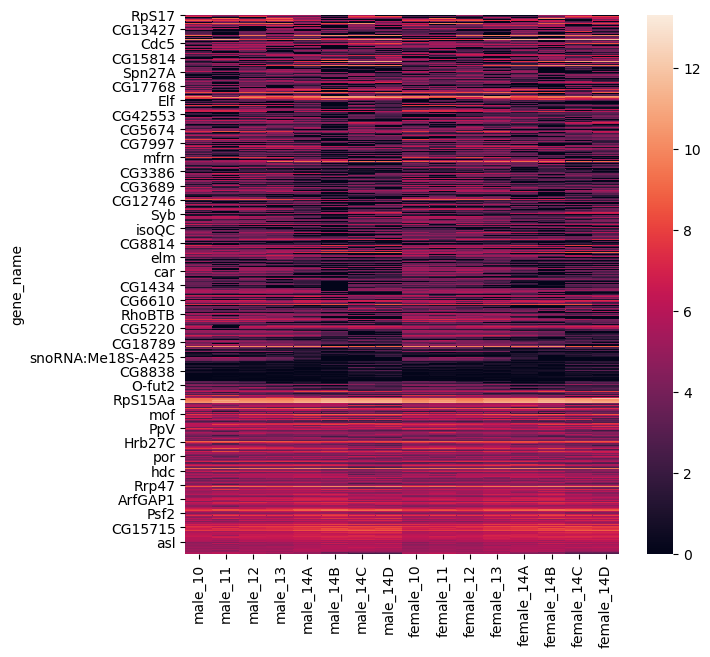

In [507]:
plt.figure(figsize = (7,7))
ax = sns.heatmap(FPKM_filter_reindex)

## plot a heatmap of the gene expression data.

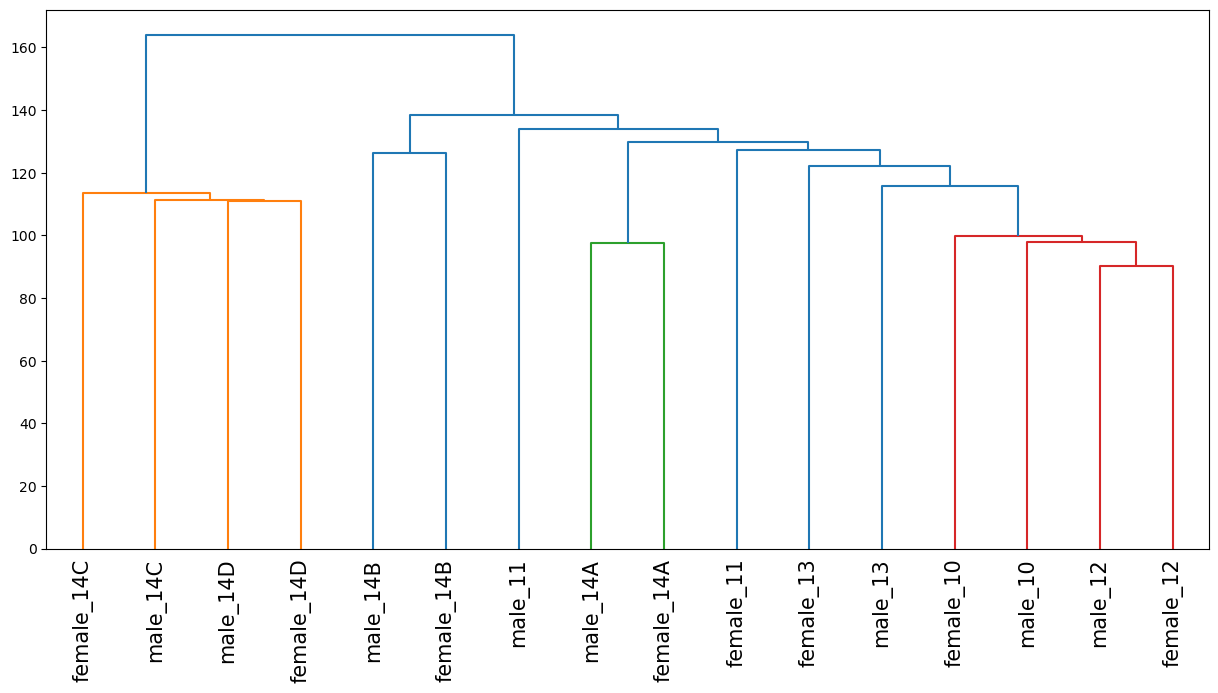

In [505]:
plt.figure(figsize=(15, 7
                   ))
dn = dendrogram(Z, 
                labels = FPKM_filter.columns[2:-1],
                leaf_rotation=90,
                leaf_font_size=15,
                )
plt.show()

# Differential expression

## Use ordinary least squares regression to test for genes that are differentially expressed across stages. Use the stage number as a numeric independent variable (10, 11, 12, 13, 14), and ignore the letter suffixes on day 14 (i.e., treat 14A, 14B, 14C, and 14D as equivalent).

In [8]:
FPKM_filter

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
3,FBtr0302347,CR40182,4.627173,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793,4.516913,3.899375,4.127810,3.767939,5.035625,4.577923,3.938306,4.186070,17.202570
8,FBtr0113885,Parp,3.584623,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051,0.000000,0.000000,3.989925,3.955963,4.415736,2.346924,0.000000,4.716147,4.087385
9,FBtr0301810,Alg-2,4.326819,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596,4.290624,1.970553,4.278193,4.777780,4.831106,3.076007,3.061631,4.572434,14.832370
10,FBtr0113895,Tim17b,2.870999,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532,5.515626,4.156566,5.752971,6.302870,6.354127,5.038433,5.647353,6.296614,52.928318
11,FBtr0345179,Tim17b,6.910803,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625,5.628798,4.265925,5.866512,6.454280,6.468371,5.150651,5.760737,6.425201,72.815582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,3.603093,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431,5.403930,0.362582,4.546982,6.569252,8.077814,4.583534,5.068813,7.775656,41.339439
34663,FBtr0100884,mt:Cyt-b,5.101875,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232,6.916130,0.742416,5.623797,6.188177,7.897266,5.482234,6.256355,7.394412,71.916695
34665,FBtr0100886,mt:ND1,4.712011,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325,8.264024,1.657007,7.656200,8.618918,8.763733,4.499640,6.537640,9.414634,222.375244
34667,FBtr0100888,mt:lrRNA,11.192486,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866,11.333058,6.277157,11.087730,11.867924,6.953149,8.821067,9.437151,12.154072,1651.994141


In [9]:
FPKM_filter_stage = FPKM_filter.iloc[:, 2:-1]
FPKM_filter_stage.rename(columns = {"male_10": 10, "male_11": 11, "male_12": 12, "male_13": 13, 
                            "male_14A": 14, "male_14B": 14, "male_14C": 14, "male_14D": 14, "female_10": 10, "female_11": 11, "female_12": 12, "female_13": 13, 
                            "female_14A": 14, "female_14B": 14, "female_14C": 14, "female_14D": 14}, inplace = True )
FPKM_filter_stage

,10,11,12,13,14,14,14,14,10,11,12,13,14,14,14,14
3,4.627173,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793,4.516913,3.899375,4.127810,3.767939,5.035625,4.577923,3.938306,4.186070
8,3.584623,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051,0.000000,0.000000,3.989925,3.955963,4.415736,2.346924,0.000000,4.716147
9,4.326819,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596,4.290624,1.970553,4.278193,4.777780,4.831106,3.076007,3.061631,4.572434
10,2.870999,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532,5.515626,4.156566,5.752971,6.302870,6.354127,5.038433,5.647353,6.296614
11,6.910803,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625,5.628798,4.265925,5.866512,6.454280,6.468371,5.150651,5.760737,6.425201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,3.603093,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431,5.403930,0.362582,4.546982,6.569252,8.077814,4.583534,5.068813,7.775656
34663,5.101875,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232,6.916130,0.742416,5.623797,6.188177,7.897266,5.482234,6.256355,7.394412
34665,4.712011,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325,8.264024,1.657007,7.656200,8.618918,8.763733,4.499640,6.537640,9.414634
34667,11.192486,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866,11.333058,6.277157,11.087730,11.867924,6.953149,8.821067,9.437151,12.154072


In [14]:
pvalues_all = []
coef_all = []
X = np.array(FPKM_filter_stage.columns, int).reshape(-1,1)
X = sm.add_constant(X)
for i in range(0, 8289):
    Y = np.array(FPKM_filter_stage.iloc[i])
    model = sm.OLS(Y, X).fit()
    pvalues_all.append(model.pvalues)
    coef_all.append(model.params[1])

In [16]:
pvalues_all

[array([0.00093222, 0.73322871]),
 array([0.35391122, 0.16137827]),
 array([0.74738636, 0.32163248]),
 array([0.58945047, 0.03126237]),
 array([0.09962026, 0.22511636]),
 array([0.1966775 , 0.00806891]),
 array([0.47031575, 0.7906545 ]),
 array([0.69883939, 0.94380319]),
 array([0.00078723, 0.00020377]),
 array([0.00856549, 0.04281093]),
 array([0.01998291, 0.07880148]),
 array([1.70687268e-05, 5.03595996e-01]),
 array([0.57877098, 0.93253373]),
 array([4.02843278e-05, 2.06894002e-06]),
 array([8.64330969e-06, 1.27250087e-06]),
 array([1.42701172e-07, 3.66751130e-04]),
 array([0.05778565, 0.21920276]),
 array([0.15975107, 0.50326933]),
 array([7.10588541e-05, 1.59203630e-02]),
 array([0.821503  , 0.07196484]),
 array([0.79651595, 0.16166911]),
 array([0.7475765, 0.170451 ]),
 array([0.06866025, 0.54639756]),
 array([1.49160815e-07, 1.26814348e-08]),
 array([0.00094309, 0.00587275]),
 array([0.00128883, 0.00787522]),
 array([0.05891228, 0.16388737]),
 array([1.19290201e-04, 3.41644133e-

In [17]:
pvalues_A = []
for i in range(0, len(pvalues_all)):
    pvalues_A.append(pvalues_all[i][1])

## Generate a QQ plot from the p-values.

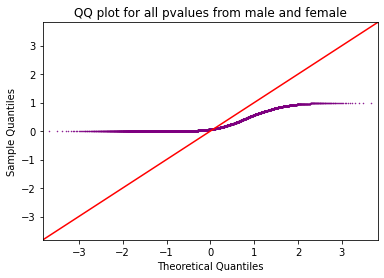

In [19]:
fig = sm.qqplot(np.array(pvalues_A), line='45', markersize = 0.5, color = "purple")
plt.title("QQ plot for all pvalues from male and female")
py.show()

## Report the list of genes that exhibit differential expression by stage at a 10% false discovery rate.



In [23]:
import statsmodels.stats as ss
corrected_all = list(ss.multitest.fdrcorrection(np.array(pvalues_A))[1])

In [24]:
FPKM_filter

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
3,FBtr0302347,CR40182,4.627173,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793,4.516913,3.899375,4.127810,3.767939,5.035625,4.577923,3.938306,4.186070,17.202570
8,FBtr0113885,Parp,3.584623,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051,0.000000,0.000000,3.989925,3.955963,4.415736,2.346924,0.000000,4.716147,4.087385
9,FBtr0301810,Alg-2,4.326819,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596,4.290624,1.970553,4.278193,4.777780,4.831106,3.076007,3.061631,4.572434,14.832370
10,FBtr0113895,Tim17b,2.870999,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532,5.515626,4.156566,5.752971,6.302870,6.354127,5.038433,5.647353,6.296614,52.928318
11,FBtr0345179,Tim17b,6.910803,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625,5.628798,4.265925,5.866512,6.454280,6.468371,5.150651,5.760737,6.425201,72.815582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,3.603093,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431,5.403930,0.362582,4.546982,6.569252,8.077814,4.583534,5.068813,7.775656,41.339439
34663,FBtr0100884,mt:Cyt-b,5.101875,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232,6.916130,0.742416,5.623797,6.188177,7.897266,5.482234,6.256355,7.394412,71.916695
34665,FBtr0100886,mt:ND1,4.712011,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325,8.264024,1.657007,7.656200,8.618918,8.763733,4.499640,6.537640,9.414634,222.375244
34667,FBtr0100888,mt:lrRNA,11.192486,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866,11.333058,6.277157,11.087730,11.867924,6.953149,8.821067,9.437151,12.154072,1651.994141


In [27]:
FPKM_filter

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median,Corrected_P,slope
3,FBtr0302347,CR40182,4.627173,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793,...,3.899375,4.127810,3.767939,5.035625,4.577923,3.938306,4.186070,17.202570,0.807779,0.025471
8,FBtr0113885,Parp,3.584623,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051,...,0.000000,3.989925,3.955963,4.415736,2.346924,0.000000,4.716147,4.087385,0.259539,0.490772
9,FBtr0301810,Alg-2,4.326819,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596,...,1.970553,4.278193,4.777780,4.831106,3.076007,3.061631,4.572434,14.832370,0.437410,0.220250
10,FBtr0113895,Tim17b,2.870999,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532,...,4.156566,5.752971,6.302870,6.354127,5.038433,5.647353,6.296614,52.928318,0.073912,0.513786
11,FBtr0345179,Tim17b,6.910803,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625,...,4.265925,5.866512,6.454280,6.468371,5.150651,5.760737,6.425201,72.815582,0.335791,0.194587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,3.603093,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431,...,0.362582,4.546982,6.569252,8.077814,4.583534,5.068813,7.775656,41.339439,0.029670,0.930661
34663,FBtr0100884,mt:Cyt-b,5.101875,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232,...,0.742416,5.623797,6.188177,7.897266,5.482234,6.256355,7.394412,71.916695,0.107550,0.721301
34665,FBtr0100886,mt:ND1,4.712011,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325,...,1.657007,7.656200,8.618918,8.763733,4.499640,6.537640,9.414634,222.375244,0.110697,0.859096
34667,FBtr0100888,mt:lrRNA,11.192486,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866,...,6.277157,11.087730,11.867924,6.953149,8.821067,9.437151,12.154072,1651.994141,0.658607,0.229427


In [29]:
FPKM_filter["Corrected_P"] = corrected_all
FPKM_filter["slope"] = coef_all
gene_list_all = FPKM_filter[FPKM_filter["Corrected_P"] < 0.05][["gene_name", "Corrected_P", "slope"]]
gene_list_all_VP = FPKM_filter[["gene_name", "Corrected_P", "slope"]]

/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# plt.scatter(gene_list_all["gene_name"], gene_list_all["Corrected_P"], s=0.3)
# plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
# plt.show()

## Repeat the analysis while controlling for sex.

## Male

In [67]:
male_FPKM = FPKM_filter.iloc[:, 2:10]
female_FPKM = FPKM_filter.iloc[:, 10:-2]

In [52]:
female_FPKM.rename(columns={"female_10": 10, "female_11": 11, "female_12": 12, "female_13": 13, 
                            "female_14A": 14, "female_14B": 14, "female_14C": 14, "female_14D": 14}, inplace=True)

In [68]:
male_FPKM.rename(columns={"male_10": 10, "male_11": 11, "male_12": 12, "male_13": 13, 
                            "male_14A": 14, "male_14B": 14, "male_14C": 14, "male_14D": 14}, inplace=True)

In [69]:
pvalues_male = []
coef_M = []
X = np.array(male_FPKM.columns, int).reshape(-1,1)
X = sm.add_constant(X)
for i in range(0, 8289):
    Y = np.array(male_FPKM.iloc[i])
    model = sm.OLS(Y, X).fit()
    pvalues_male.append(model.pvalues)
    coef_M.append(model.params[1])

In [70]:
pvalues_M = []
for i in range(0, len(pvalues_male)):
    pvalues_M.append(pvalues_male[i][1])
corrected_M = list(ss.multitest.fdrcorrection(np.array(pvalues_M))[1])

In [71]:
male_FPKM["corrected P"] = corrected_M
male_FPKM["slope"] = coef_M

In [72]:
male_FPKM

,10,11,12,13,14,14,14,14,corrected P,slope
3,4.627173,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793,0.975886,0.006764
8,3.584623,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051,0.758699,0.276113
9,4.326819,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596,0.608642,0.316809
10,2.870999,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532,0.170946,0.799590
11,6.910803,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625,0.730702,0.159156
...,...,...,...,...,...,...,...,...,...,...
34658,3.603093,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431,0.152786,1.025949
34663,5.101875,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232,0.335251,0.825548
34665,4.712011,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325,0.157776,1.300688
34667,11.192486,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866,0.566695,0.504166


In [73]:
gene_M = FPKM_filter[male_FPKM["corrected P"] < 0.05][["gene_name"]]
gene_M["Corrected_P"] = male_FPKM[male_FPKM["corrected P"] < 0.05]["corrected P"]
gene_M["slope"] = male_FPKM[male_FPKM["corrected P"] < 0.05]["slope"]
# gene_M["P_logTrans"] = -np.log10(male_FPKM[male_FPKM["corrected P"] < 0.05]["corrected P"])
gene_M_VP = male_FPKM[["corrected P", "slope"]]
gene_M_VP["gene"] = FPKM_filter["gene_name"]

/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
gene_M_VP

,corrected P,slope,gene
3,0.975886,0.006764,CR40182
8,0.758699,0.276113,Parp
9,0.608642,0.316809,Alg-2
10,0.170946,0.799590,Tim17b
11,0.730702,0.159156,Tim17b
...,...,...,...
34658,0.152786,1.025949,mt:ND4
34663,0.335251,0.825548,mt:Cyt-b
34665,0.157776,1.300688,mt:ND1
34667,0.566695,0.504166,mt:lrRNA


## Female

In [53]:
pvalues_female = []
coef_F = []
X = np.array(female_FPKM.columns, int).reshape(-1,1)
X = sm.add_constant(X)
for i in range(0, 8289):
    Y = np.array(female_FPKM.iloc[i])
    model = sm.OLS(Y, X).fit()
    pvalues_female.append(model.pvalues)
    coef_F.append(model.params[1])
pvalues_F = []
for i in range(0, len(pvalues_female)):
    pvalues_F.append(pvalues_female[i][0])
corrected_F = list(ss.multitest.fdrcorrection(np.array(pvalues_F))[1])
female_FPKM["corrected P"] = corrected_F
female_FPKM["slope"] = coef_F
gene_F = FPKM_filter[female_FPKM["corrected P"] < 0.05][["gene_name"]]
gene_F["Corrected_P"] = female_FPKM[female_FPKM["corrected P"] < 0.05]["corrected P"]
gene_F["slope"] = female_FPKM[female_FPKM["corrected P"] < 0.05]["slope"]
gene_F_VP = female_FPKM[["slope", "corrected P"]]

In [80]:
gene_F
gene_F_VP

,slope,corrected P
3,0.055578,0.134761
8,0.577589,0.554419
9,0.072734,0.572906
10,0.193567,0.348254
11,0.195008,0.339042
...,...,...
34658,0.705112,0.697325
34663,0.543373,0.903476
34665,0.238751,0.779577
34667,-0.269793,0.230050


## gene_list_all
## gene_M
## gene_F

In [56]:
from bioinfokit import analys, visuz

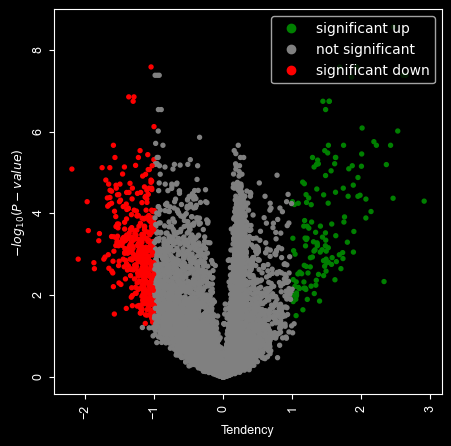

In [83]:
visuz.gene_exp.volcano(df=gene_list_all_VP, lfc='slope', pv='Corrected_P', show = True, theme = "dark", 
                       plotlegend=True, legendpos='upper right', axxlabel = "Tendency")

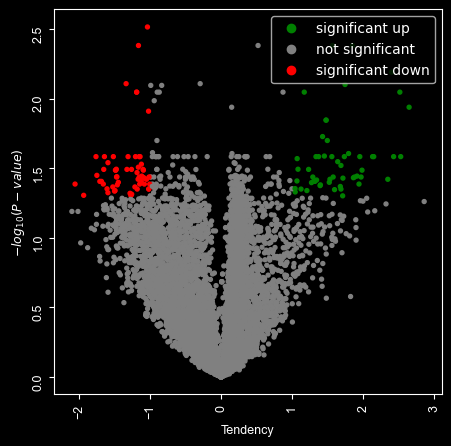

In [84]:
visuz.gene_exp.volcano(df=gene_M_VP, lfc='slope', pv='corrected P', show = True, theme = "dark", plotlegend=True, legendpos='upper right', axxlabel = "Tendency")

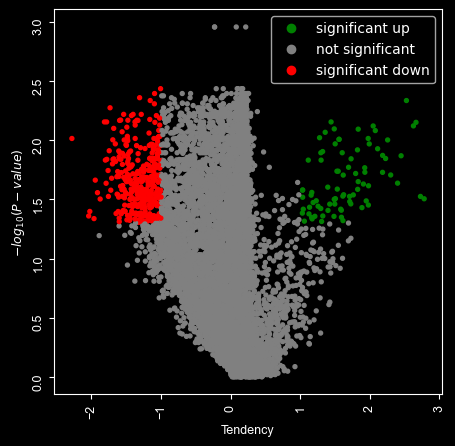

In [85]:
visuz.gene_exp.volcano(df=gene_F_VP, lfc='slope', pv='corrected P', show = True, theme = "dark", plotlegend=True, legendpos='upper right', axxlabel = "Tendency")